# Two Body Relative Motion Problem

Computes the orbit of a 1000kg spacecraft around the Earth using the RKF4(5) method.

### Import libraries and modules

In [1]:
import numpy as np
from sympy.physics.mechanics import dynamicsymbols
from scipy.integrate import solve_ivp
import numpy.linalg as linalg
import matplotlib.pyplot as plt

### Set up initial conditions

In [2]:
G = 6.67259e-20 # Gravitational constant

mass = np.array([5.974e24, 1000])
R = 6378

R0 = np.array([8000, 0, 6000])
V0 = np.array([0, 7, 0])

tspan = (0, 4*3600)

mu = G*(mass.sum())

y0 = np.concatenate((R0, V0))

### Main function

In [3]:
def orbit(y0, tspan):
    
    def ode_func(t, y):
        # Get position vector of satellite
        Rs = y[:3]
        
        # Get velocity vector of satellite
        Vs = y[3:6]
        
        # Calculate acceleration vector of satellite
        r = linalg.norm(Rs)
        As = -mu*Rs/(r**3)
        
        # Return input for RKF4(5) method
        dydt = np.concatenate((Vs, As))
        return dydt
    
    sol = solve_ivp(ode_func, tspan, y0, method="RK45", max_step=1)
    return sol

### Run and plot function

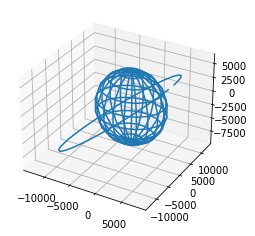

In [8]:
sol = orbit(y0, tspan)

# Find position vector
Rx = sol.y[0]
Ry = sol.y[1]
Rz = sol.y[2]

# Plot Earth as a wireframe sphere
%matplotlib inline
fig = plt.figure("Orbit of 1000kg satellite")
ax = fig.add_subplot(projection='3d')

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = R*np.cos(u)*np.sin(v)
y = R*np.sin(u)*np.sin(v)
z = R*np.cos(v)
ax.plot_wireframe(x, y, z)

# Plot satellite orbit
ax.plot(Rx, Ry, Rz)